[[ 0. 68.  7. 32. 80. 48. 44. 58. 77. 75. 60. 69. 37. 88. 54.]
 [68.  0. 95. 27. 41. 51. 34. 25. 19. 48. 15. 69. 93. 52. 53.]
 [ 7. 95.  0. 29. 10.  8. 78. 87. 81. 76. 72. 57. 52. 51. 67.]
 [32. 27. 29.  0. 70. 41. 58. 80. 45. 19. 65. 46. 29.  7. 73.]
 [80. 41. 10. 70.  0. 99. 19. 19. 51. 51. 69. 48. 22. 22. 99.]
 [48. 51.  8. 41. 99.  0. 70. 73.  3. 93. 73. 21. 78. 61. 30.]
 [44. 34. 78. 58. 19. 70.  0. 60. 89. 17. 20. 80. 26. 95. 21.]
 [58. 25. 87. 80. 19. 73. 60.  0. 83. 56. 65. 63. 85. 53. 34.]
 [77. 19. 81. 45. 51.  3. 89. 83.  0. 38. 79. 45. 88. 82. 92.]
 [75. 48. 76. 19. 51. 93. 17. 56. 38.  0. 60. 34. 84. 52. 24.]
 [60. 15. 72. 65. 69. 73. 20. 65. 79. 60.  0.  1. 88. 30. 10.]
 [69. 69. 57. 46. 48. 21. 80. 63. 45. 34.  1.  0. 44. 21. 10.]
 [37. 93. 52. 29. 22. 78. 26. 85. 88. 84. 88. 44.  0. 47. 36.]
 [88. 52. 51.  7. 22. 61. 95. 53. 82. 52. 30. 21. 47.  0. 62.]
 [54. 53. 67. 73. 99. 30. 21. 34. 92. 24. 10. 10. 36. 62.  0.]]
Минимальное остовное дерево
 [[-1.  1.  1.  1.  0.  1.

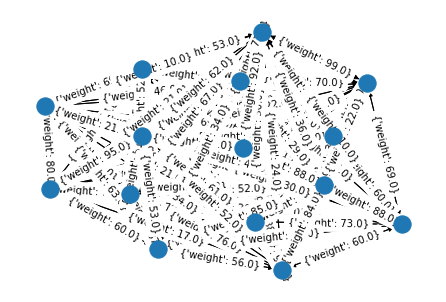

[[-1. 68.  7. 32.  0. 48. 44. 58. 77. 75. 60.  0. 37.  0. 54.]
 [68. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 7.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [32.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [48.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [44.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [58.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [77.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [75.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [60.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.]
 [37.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [54.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]


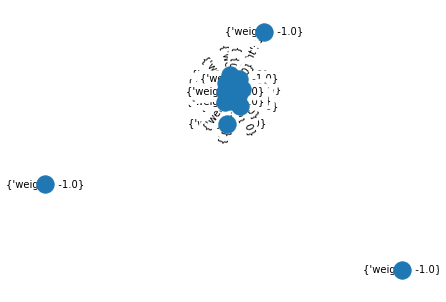

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nw


def first_connection():
    minim = matrix[0][1]
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i + 1, n):
            if minim > matrix[i][j]:
                minim = matrix[i][j]
                i_min, j_min = i, j
    connection[i_min][j_min] = connection[j_min][i_min] = 1
    connection[i_min][i_min] = connection[j_min][j_min] = -1


def lync_all():
    minim = None
    i_min, j_min = 0, 1
    for i in range(n):
        if connection[i][i] == -1:
            for j in range(n):
                if connection[j][j] == 0:
                    if (minim == None or minim > connection[i][j]):
                        minim = connection[i][j]
                        i_min, j_min = i, j
    connection[i_min][j_min] = connection[j_min][i_min] = 1
    connection[i_min][i_min] = connection[j_min][j_min] = -1


def delete_connection():
    maxim = 0
    i_max, j_max = -1, -1
    for i in range(n):
        for j in range(i + 1, n):
            if connection[i][j] == 1:
                if matrix[i][j] > maxim:
                    maxim = matrix[i][j]
                    i_max, j_max = i, j
    connection[i_max][j_max] = 0
    connection[j_max][i_max] = 0
    
def show_graph(graph):
    G = nw.from_numpy_matrix(graph, create_using=nw.DiGraph)
    layout = nw.spring_layout(G)
    nw.draw(G, layout)
    nw.draw_networkx_edge_labels(G, pos=layout)
    plt.show()


#сетим данные
n, k = 15, 3
matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        matrix[i][j] = matrix[j][i] = np.random.randint(1, 100)
print(matrix)
connection = np.zeros((n, n))
first_connection()
for i in range(n - 2):
    lync_all()
for i in range(k - 1):
    delete_connection()

print("Минимальное остовное дерево\n", connection)
show_graph(matrix)

#преобразовываем наш граф
new_g = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if connection[i][j] != -1:
            new_g[i][j] = connection[i][j] * matrix[i][j]
        else:
            new_g[i][j] = -1
print(new_g)

show_graph(new_g)

In [ ]:
#получился паук какой-то))